# Distributions
https://towardsdatascience.com/deep-diving-statistical-distributions-with-python-for-data-scientists-a0a4badc8d1a

https://simone-carolini.medium.com/statistical-distributions-with-python-f69ef4e26bab

https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

Probability distributions are a fundamental concept in statistics. <br>
They are used both on a theoretical level and a practical level.

Some __practical uses of probability distributions__ are:
- To calculate confidence intervals for parameters and to calculate critical regions for hypothesis tests.
 - For univariate data, it is often useful to determine a reasonable distributional model for the data.
- Statistical intervals and hypothesis tests are often based on specific distributional assumptions. <br> 
Before computing an interval or a test based on a distributional assumption, we need to verify that <br>
the assumption is justified for the given data set. In this case, the distribution does not need to be the best-fitting <br> distribution for the data, but an adequate enough model so that the statistical technique yields valid conclusions.
- Simulation studies with random numbers generated from using a specific probability distribution are often needed. 


__Abbriviations:__

- __rv__ - random variable: variable whose value is unknown or a function that assigns values to each of an experiment's outcomes.
- __rvs__ - random variates: a particular outcome of a random variable
- __pmf__ - probability mass fct. : gives the probability that a discrete rv is exactly equal to some value.
- __pdf__ - probability density fct. : describes the prob. of the value of a continuous rv falling within a range,</br> 
                    it needs to be integrated over an interval in order to yield a probability
- __cdf__ - cumulative distribution fct.: shows prob. that a rv X is found at a value (e.g. 200 pieces) equal to or less than a certain x.
- __ppf__  - percent point fct.: inverse of cdf -  shows point where a given prob. (e.g. 50 %) of obersvations lie left of it<br>
- __sf__ - Survival Function (1-CDF, percentage of observations > x)<br>
- __isf__ - Inverse Survival Function (Inverse of SF)

__Density Functions__: Distribution are usually described in terms of their density functions:</br>

- __PDF (Probability Density Function)__ is used to calculate the likelihood of a given observation in a **continous** distribution.

- __CDF (Cumulative Density Function)__ calculates the cumulative likelihood for the observation and all prior observations in the sample space. Cumulative density function is a plot that goes from 0 to 1.

- __PMF (Probability Mass Function)__ is a function that gives the probability that a discrete random variable is exactly equal to some value. It differs from a PDF because the latter is associated with continuous random variables and it needs to be integrated over an interval in order to yield a probability. We therefore refer to PMF when touching upon **discrete** distributions — in this case — Bernoulli, Binomial, and Geometric.
-  __PPF (percent point function)__ inverse of the cumulative distribution function, for a distribution function we calculate the probability that the variable is less than or equal to x for a given x. Here we start with the probability and compute the corresponding x for the cumulative distribution.


CDF & PMF       <img src="https://abaqus-docs.mit.edu/2017/English/SIMA3DXRefImages/pdf-defin-nls.png">

## Uniform Distribution
- In this sort of distribution, values within a specific range (between a and b) are equally likely to occur. 
- Values outside that given range never occur.

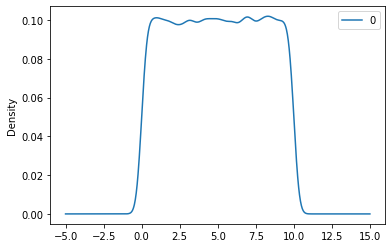

In [ ]:
import pandas as pd
import scipy.stats as stats
# loc= a, scale=b
uniform_data = stats.uniform.rvs(size=100_000,loc=0, scale=10);
pd.DataFrame(uniform_data).plot(kind='density');

###  Cumulative distribution function (CDF)

In [ ]:
# gives us the probability of an observation lying between loc and x of the uniform distribution.
stats.uniform.cdf(x=75, loc=50, scale=100)

0.25

### Percent point function
- The inverse of cdf.
- Given the probability, ppf gives the cutoff on the x axis. 
- value that cuts off the probability distribution, where there is a x% chance of drawing an observation left of this cutoff value

In [ ]:
# here 30% of observtions lie below 80
#  Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale].
stats.uniform.ppf(
    q=0.9,                  # probability cutoff
    loc=30,                # distribution start
    scale=100)          # distribution end (loc + scale)


120.0

### Probability density function (pdf)
probability of a point observation in a given **continous** distribution

In [ ]:
import scipy.stats as stats
stats.uniform.pdf(x=4,loc=0, scale=20)

0.05

In [ ]:
from numpy import random
random.uniform(0, 10, (2,3))


array([[9.3740387 , 2.13529495, 6.05711178],
       [6.40978629, 9.83918857, 6.52327738]])

## Normal /Gausssian
- The normal distribution always describes a __symmetric, unimodal, bell-shaped curve__. 
- The distribution depends on two parameters,  𝜇 and 𝜎, therefore we can write it as 𝑁(𝜇,𝜎). 
- When __𝜇=0 and 𝜎=1__, then in that case we talk about __Standard Normal distribution__.

$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal.

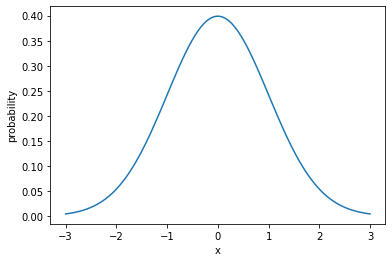

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, scipy.stats as stats, math
# 𝜇=0             𝜎**2=1                    𝜎=1
mu = 0;         variance = 1;           sigma = math.sqrt(variance)
x_axis = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = stats.norm.pdf(x_axis, mu, sigma)
df = pd.DataFrame({'probability': pdf, 'x': x_axis})
sns.lineplot(data=df, x='x', y='probability');

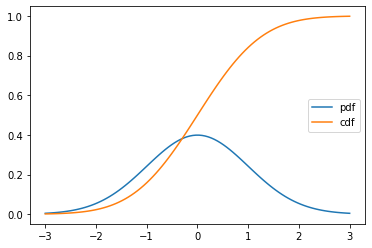

In [ ]:
cdf = stats.norm.cdf(x_axis, mu, sigma)
df = pd.DataFrame({'probability_pdf': pdf, 'probability_cdf': cdf, 'x': x_axis})
# sns.lineplot(data=df, x='x', y='probability_cdf');
plt.plot(x_axis, df.probability_pdf, label='pdf')
plt.plot(x_axis, df.probability_cdf, label='cdf')
plt.legend(loc='right')

In [ ]:
from scipy.stats import norm
# probability to see a value under 1400, when we have a normal diststro with mean is μ=1100 and variance σ = 200?
p_value_left = norm.cdf(x=1400, loc=1100, scale=200); 
p_value_left

0.9331927987311419

In [ ]:
# probability that we see a value above 1400
p_value_right = 1 - norm.cdf(x=1400, loc=1100, scale=200)
p_value_right

0.06680720126885809

In [ ]:
p_value_left+p_value_right

1.0

In [ ]:
from scipy.stats import norm
# using standardized z-score: Z = (x-𝜇)/𝜎 = (1400–1100) / 200 = 1.5
norm.sf((1.5))        # sf = 1 - cdf : probability to find a value above x
1 - norm.sf(1.5)     # 1 - sf = cdf : probability to find a value under x

0.9331927987311419

In [ ]:
# x% quantile, percentage point is the cutoff value that has x% of the distribution to the left of it
print(stats.norm.ppf(q=0.75))

NameError: name 'stats' is not defined

In [ ]:
# random numbers from a normal distribution of a particular mean and standard deviation
# mean, std, size
np.random.normal(1, 2, (3,2))

array([[-2.97158887,  0.32875287],
       [ 2.45125776,  1.82765682],
       [-1.56081246, -2.10099321]])

In [ ]:
# random numbers from a normal distribution between 0 and 1
# row, col
np.random.rand(3, 2)

array([[0.85567439, 0.82840517],
       [0.39355712, 0.76113585],
       [0.52102372, 0.60167845]])

In [ ]:
# random numbers from a standard normal distribution
# This is a special case 'randn'  of the normal distribution when μ = 0  and σ = 1
np.random.randn(3, 2)

array([[ 0.10697596,  0.23867035],
       [-1.66626204, -1.96403154],
       [-2.10682777, -0.7897286 ]])

## Student’s t-Distribution
- Student distribution is used to __estimating the mean of a normally-distributed population__ in situations <br> 
where the __sample size is small and the population’s standard deviation is unknown__. 
- The t-distribution is symmetric and bell-shaped, like the Normal distribution, however it has heavier tails, </br>
meaning it is more prone to producing values that fall far from its mean. 
- t-distribution is characterised by the degrees of freedom which equals to 𝜈=𝑛−1 (𝜈 is pronounced as nu).
- You can see from the graph, the higher the degree of freedom, the slimmer are the tails. 
- This also means that with 𝜈 increasing the t-distribution approximates more and more to the Normal distribution. 
- More on the subject at the following link: https://mathworld.wolfram.com/Studentst-Distribution.html.

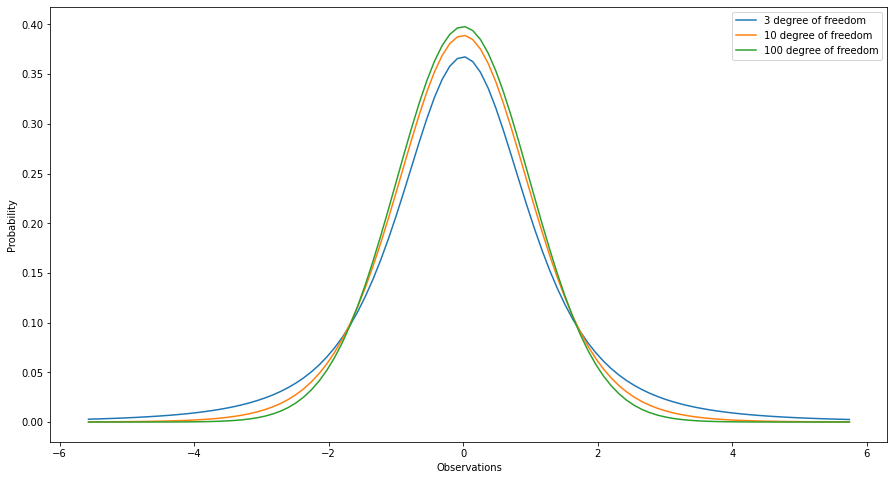

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, scipy.stats as stats, math

mu = 1.5;       variance = 2;       sigma = math.sqrt(variance)

x_axis = np.linspace(mu - 5 * sigma, mu + 3 * sigma, 100)
dof = len(x_axis) - 1

pdf_3 = stats.t.pdf(x_axis, 3)
pdf_10 = stats.t.pdf(x_axis, 10)
pdf_100 = stats.t.pdf(x_axis, 100)
df = pd.DataFrame({'pdf_3': pdf_3, 'pdf_10': pdf_10, 'pdf_100': pdf_100, 'x_axis': x_axis})

plt.figure(figsize=(15, 8));
plt.plot(df['x_axis'], df['pdf_3'], label='3 degree of freedom');
plt.plot(df['x_axis'], df['pdf_10'], label='10 degree of freedom');
plt.plot(df['x_axis'], df['pdf_100'], label='100 degree of freedom');
plt.xlabel('Observations');
plt.ylabel('Probability');
plt.legend();
plt.show()


## Binomial Distribution
- has only 2 possible outcomes in experiments. 
- We can use the binomial distribution to find the probability of success and failure. 
- It tells you how likely it is to get a success in a number of trials. 
- A trial could have multiple events. For example — flipping fair coin 10 times = 1 trial.

$f(k,n,p) = \Pr(k;n,p) = \Pr(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$

In [ ]:
from scipy.stats import binom
from pandas import crosstab
# rvs - random variates - particular outcome of a random variable: rvs of a rv usually have different outcomes 
coin=binom.rvs(size=100000,             # number of trials
          n=10,                                              # number of flips in a trial
          p=0.5)                                             # probability of success (e.g. getting heads)

In [ ]:
import pandas as pd
pd.DataFrame(crosstab(index="counts", columns=coin))

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
counts,109,966,4461,11654,20326,24692,20584,11692,4405,1010,101


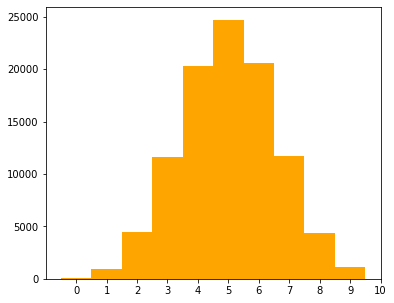

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)
ax1.set_xticks(np.arange(11))
ax1.hist(coin, align="left", color="orange");

In [ ]:
# If we now flip an unfair coin with 80% chance for heads, the graph should become right skewed 
# because we would have more results of getting heads.
coin = stats.binom.rvs(
    size=100000,   # number of trials
    n=10,                # number of flips in a trial
    p=0.8)               # probability of success

pd.DataFrame(pd.crosstab(index="counts", columns=coin))

col_0,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,
counts,9,85,544,2699,8922,19990,30364,26585,10802


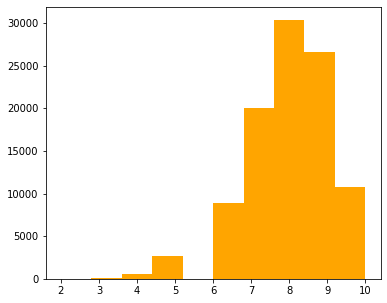

In [ ]:
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111);
ax1.set_xticks(np.arange(11));
ax1.hist(coin, align="mid", color="orange");
plt.show()

In [ ]:
# Cumulative distribution function (cdf)
stats.binom.cdf(
    k=5,                # probability of k success or less
    n=10,             # in n trails
    p=0.8)           # success probability 

0.03279349759999997

In [ ]:
# more than 5 succecces
1 - stats.binom.cdf(k=5, n=10, p=0.8)  

0.9672065024000001

In [ ]:
# pmf gives the probability that a discrete rv is exactly equal to some value. 
# It is the proportion of observations at a given number of successes k.
stats.binom.pmf(k=5, n=10, p=0.5)              

0.24609375000000003

In [ ]:
# we can generate random numbers from a particular binomial distribution 
# by giving the parameters n (number of trials) and p (probability of success).
x = np.random.binomial(n=100, p=0.7, size=(2, 3))
print(x)

[[69 74 72]
 [64 75 63]]


## Geometric Distribution
- A discrete distribution __that models the amount of time it takes for an event to occur.__ 
- For example, if success = heads, how many trials does it take to get success when flipping a fair coin?
- Half of the time, it takes only 1 flip to get a head. That makes sense as we are flipping a fair coin. 

$\Pr(X = k) = (1 - p)^{k-1}$

In [ ]:
heads2 = stats.geom.rvs(
    size=10000,    # We generate 10_000 trails of flips
    p=0.5)              # fair coin

pd.DataFrame(pd.crosstab(index="counts", columns=heads2))

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13
row_0,,,,,,,,,,,,,
counts,5116,2464,1238,587,300,147,75,28,15,16,7,4,3


In [ ]:
# Cumulative distribution function - probability of success in first 3 flips
three_flip = stats.geom.cdf(k=3, p=0.5)
print(three_flip)

0.875


In [ ]:
# prob. successes in excatly 2 trails 
stats.geom.pmf(k=2, p=0.5)

0.25

## Exponential Distribution
- It is the continuous analogue of the geometric distribution, and it has the key property of being memoryless.
- It models the amount of time it takes for a certain event to occur, given an occurrence avg. rate.
- https://mathepedia.de/Exponentialverteilung.html
- https://www.alphacodingskills.com/scipy/scipy-exponential-distribution.php

Die Exponentialverteilung ist eine typische Lebensdauerverteilung. So ist beispielsweise die Lebensdauer von elektronischen Bauelementen häufig annähernd exponentialverteilt. Hierbei spielt besonders die Gedächtnislosigkeit eine bedeutende Rolle: die Wahrscheinlichkeit, dass ein x Tage altes Bauelement noch mindestens t Tage hält, ist demnach genauso groß wie die, dass ein neues Bauelement überhaupt t Tage hält. Charakteristisch bei der Exponentialverteilung ist die konstante Ausfallrate λ.

Funktionsdauer von Weckern. Es stellt sich heraus, dass durchschnittlich pro Tag 5 ‰ (Promille, Tausendstel) der Wecker unabhängig von ihrem Alter ausfallen.

Die Zufallsgröße X =  „Zeitdauer der Funktionsfähigkeit eines Funkweckers in Tagen“ ist also exponentialverteilt mit der Ausfallrate λ = 0,005. Entsprechend beträgt die durchschnittliche Zeitdauer, bis ein Wecker ausfällt, 1 / λ = 200 Tage.

Die Wahrscheinlichkeit, dass ein Wecker höchstens (noch) 20 Tage hält (spätestens nach 20 Tagen ausfällt) , ist

$1 − e^{− 0,005 ⋅ 20} = 0,0952$

d. h. nach 20 Tagen sind durchschnittlich ca. 10 % der Wecker ausgefallen.

Entsprechend ist der Anteil der Wecker, die mindestens 180 Tage aushalten,

$1 − ( 1 − e^{− 0,005 ⋅ 180} ) = 1 − 0,5934 = 0,4066$

also halten durchschnittlich ca. 40 % der Wecker länger als 180 Tage.

In [ ]:
from scipy.stats import expon
# scale = 1/λ
# x = time
expon.cdf(x=10, scale=200)

0.048770575499286

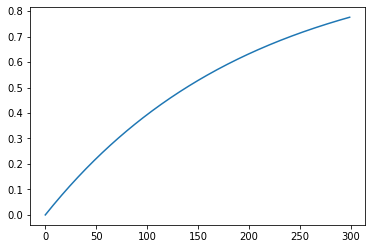

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# with every day the probability of a part failing cumulates
x = np.arange(0, 300, 1);
y = expon.cdf(x=x, scale=200);
plt.plot(x, y);
plt.show()

In [ ]:
1 - expon.cdf(x=180, scale=200)

0.4065696597405991

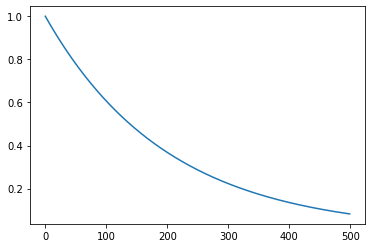

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# with every day it's less probable that a part fails the first time
x = np.arange(0, 500, 1);
y = 1-expon.cdf(x=x, scale=200);
plt.plot(x, y);
plt.show()

          0
0  0.005000
1  0.004975
2  0.004950
3  0.004926
4  0.004901
5  0.004877
6  0.004852
7  0.004828
8  0.004804
9  0.004780


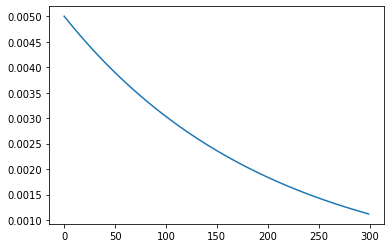

In [ ]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
import pandas as pd
# separate probability of failing for every day for next 300 days
x = np.arange(0, 300, 1);
y = expon.pdf(x=x, scale=200);
print(pd.DataFrame(y).head(10))
plt.plot(x, y);
plt.show()

## Poisson Distribution
- models the probability of success/event occurrence within a given time interval. 
- e.g. if a waiting room has an arrival rate two persons per hour, how many arrivals happen in an hour?
- Wsk.verteilung, mit der die Anz. von Ereignissen modelliert werden kann, die bei konstanter mittlerer Rate unabhängig voneinander in einem festen Zeitintervall oder räumlichen Gebiet eintreten.
- Sie wird durch einen reellen Parameter λ > 0  bestimmt, der den Erwartungswert und gleichzeitig die Varianz der Verteilung beschreibt.

In [ ]:
from scipy.stats import poisson
import pandas as pd
arr = poisson.rvs(size=10000, mu=2)  #average arrival time 2
pd.DataFrame(pd.crosstab(index='counts', columns=arr))


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
counts,1357,2675,2680,1817,949,369,107,35,10,1


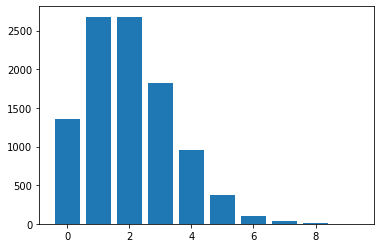

In [ ]:
plt.hist(arr, rwidth=0.8, bins=np.arange(11) - 0.5);